In [2]:
import pandas as pd

In [3]:
close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)

In [4]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [5]:
close_px = close_px.resample('B').ffill()

In [6]:
close_px 

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33
1990-02-08,7.71,0.51,6.35
1990-02-09,8.00,0.52,6.37
1990-02-12,7.94,0.52,6.22
1990-02-13,8.06,0.52,6.23
1990-02-14,8.00,0.52,6.20


In [7]:
close_px['AAPL'].plot()

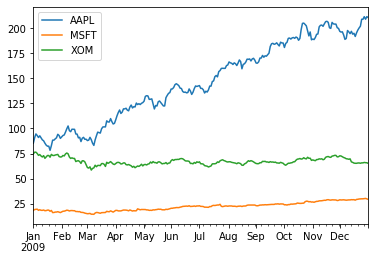

In [8]:
close_px.loc['2009'].plot()

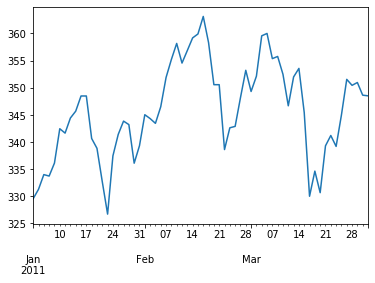

In [8]:
close_px['AAPL'].loc['01-2011':'03-2011'].plot()

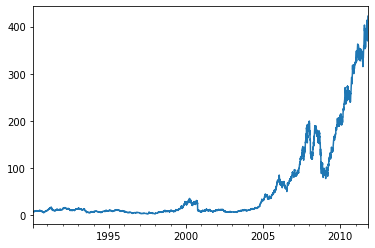

In [9]:
close_px.AAPL.plot()

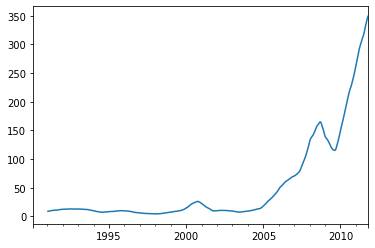

In [10]:
close_px.AAPL.rolling(250).mean().plot()

In [11]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

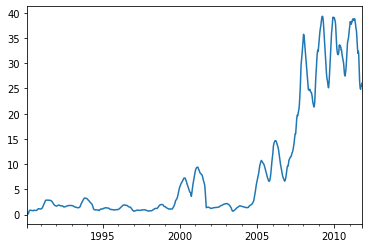

In [12]:
appl_std250.plot()

In [13]:
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

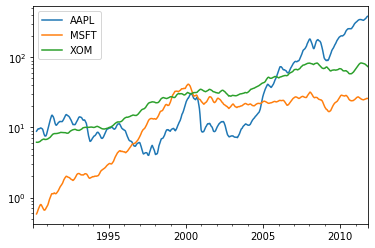

In [14]:
close_px.rolling(60).mean().plot(logy=True)

In [15]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Exponentially-weighted MA')

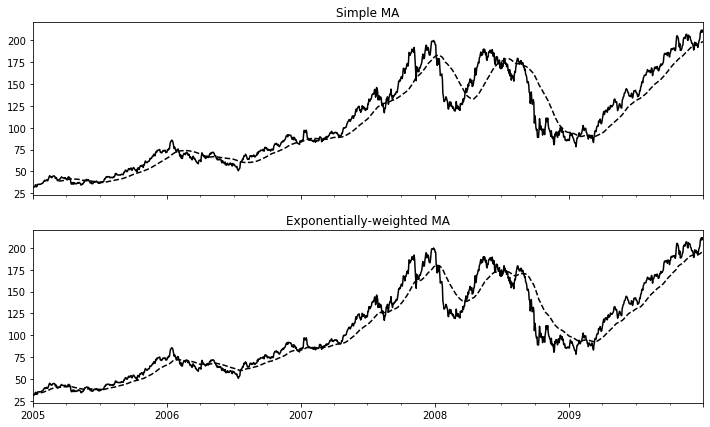

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12, 7))
aapl_px = close_px.AAPL['2005':'2009']
#ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50) 
ma60 = aapl_px.rolling(60, min_periods=50).mean()
#ewma60 = pd.DataFrame.ewm(aapl_px, span=60)
ewma60 = aapl_px.ewm(span=60).mean()
aapl_px.plot(style='k-', ax=axes[0]) 
ma60.plot(style='k--', ax=axes[0]) 
aapl_px.plot(style='k-', ax=axes[1]) 
ewma60.plot(style='k--', ax=axes[1]) 
axes[0].set_title('Simple MA') 
axes[1].set_title('Exponentially-weighted MA')


In [17]:
spx_px = close_px_all['SPX']
spx_rets = spx_px / spx_px.shift(1) - 1

In [18]:
returns = close_px.pct_change()

In [19]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

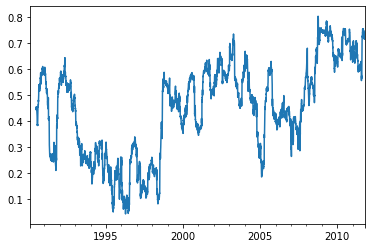

In [20]:
corr.plot()

In [21]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

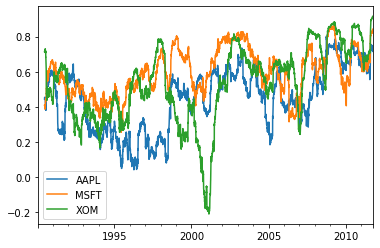

In [22]:
corr.plot()